# Proyek Analisis Data: Bike Sharing
- **Nama:** Rifqi Nabil Akbar
- **Email:** rifqiiakbar12@gmail.com
- **ID Dicoding:** rifqiakbar12

## Menentukan Pertanyaan Bisnis

- Berapa jumlah penyewa sepeda per bulan selama 2 tahun terakhir?

- Bagaimana musim dapat mempengaruhi jumlah penyewaan sepeda?

- Bagaimana cuaca dapat mempengaruhi jumlah penyewaan sepeda?

- di hari dan jam berapakah persewaan sepeda paling banyak di lakukan?

## Import Semua Packages/Library yang Digunakan

In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import streamlit as st

## Data Wrangling

### Gathering Data

**Insight:**
- Hour.csv menampilkan data penyewaan sepeda per jamnya di setiap harinya
- Day.csv menampilkan data penyewaan sepeda per hari

**Membuat Dataframe menggunakan dataset Hour dan Day**

**`hour_df` sebagai dataset peminjaman Perjamnya**

**`day_df` sebagai dataset peminjaman Perharinya**

In [3]:
hour_df = pd.read_csv('https://raw.githubusercontent.com/Nabielz1/Bike_Sharing_Analysis/refs/heads/main/data/hour.csv')
day_df =  pd.read_csv('https://raw.githubusercontent.com/Nabielz1/Bike_Sharing_Analysis/refs/heads/main/data/day.csv')

### Assessing Data

- melihat apakah ada missing value?
- melihat apakah ada invalid value?
- melihat apakah ada duplicate data? dll

#### 1. Assesing `hour_df`

**A. Cek apakah terdapat data duplicate di** `hour_df`

In [4]:
print(f"Jumlah duplikat pada hour_df: {hour_df.duplicated().sum()}")


Jumlah duplikat pada hour_df: 0


Tidak ada data yang duplikat di dataset hour


**B. Cek apakah terdapat Missing Value di** `hour_df`

In [5]:
print(hour_df.isnull().sum())


instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


Tidak ada missing value di hour datset

**C. Cek apakah terdapat Kesalahan dalam column** `hour_df`

In [6]:
hour_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


terdapat kesalahan tipe data di `dteday` -> seharusnya **datetime**

---



**D. Cek apakah terdapat data duplicate di** `hour_df`

In [7]:

print(f"Jumlah unique value pada kolom instant: {hour_df['instant'].nunique()}")
print(f"Jumlah baris pada dataframe: {hour_df.shape[0]}")


Jumlah unique value pada kolom instant: 17379
Jumlah baris pada dataframe: 17379


unique value sesuai dengan jumlah data



**E. Cek apakah ada inacurate atau invalid value di parameter stastistik di** `hour_df`

In [8]:
for column in ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']:
  print(f"Unique values for {column}: {hour_df[column].unique()}")

  print ('=================================================')

for column in ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']:
  print(f"Descriptive statistics for {column}:\n{hour_df[column].describe()}")
print ('=================================================')

if hour_df['hum'].max() > 1:
  print("Ada nilai hum yang tidak akurat (lebih besar dari 1)")
else : print("Tidak ada nilai hum yang tidak akurat (lebih besar dari 1)")


Unique values for season: [1 2 3 4]
Unique values for yr: [0 1]
Unique values for mnth: [ 1  2  3  4  5  6  7  8  9 10 11 12]
Unique values for hr: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Unique values for holiday: [0 1]
Unique values for weekday: [6 0 1 2 3 4 5]
Unique values for workingday: [0 1]
Unique values for weathersit: [1 2 3 4]
Descriptive statistics for temp:
count    17379.000000
mean         0.496987
std          0.192556
min          0.020000
25%          0.340000
50%          0.500000
75%          0.660000
max          1.000000
Name: temp, dtype: float64
Descriptive statistics for atemp:
count    17379.000000
mean         0.475775
std          0.171850
min          0.000000
25%          0.333300
50%          0.484800
75%          0.621200
max          1.000000
Name: atemp, dtype: float64
Descriptive statistics for hum:
count    17379.000000
mean         0.627229
std          0.192930
min          0.000000
25%          0.480000
50%       

Tidak Terdapat kesalahan


#### Rangkuman
**1. Terdapat ketidaksesuaian tipe data di kolom `dteday`**

#### 2. Assesing `day_df`

**A. Cek Apakah Ada Duplicate Value di** `day_df`

In [9]:
print(f'Jumlah data duplicate : {day_df.duplicated().sum()}')

Jumlah data duplicate : 0


Tidak ada Duplicate Value

**B. Cek Apakah Ada Missing Value di** `day_df`

In [10]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Tidak ada Missing Value

**C. Cek apakah terdapat Kesalahan dalam column** `day_df`

In [11]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Terdapat kesalahan tipe data, yaitu pada kolom** `dteday` -> **seharusnya** `datetime`

**E. Cek apakah ada inacurate atau invalid value di parameter stastistik di** `hour_df`

In [12]:

for column in ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']:
  print(f"Unique values for {column}: {day_df[column].unique()}")

  print ('=================================================')

for column in ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']:
  print(f"Descriptive statistics for {column}:\n{day_df[column].describe()}")

print ('=================================================')


if day_df['hum'].max() > 1:
  print("Ada nilai hum yang tidak akurat (lebih besar dari 1)")
else : print("Tidak ada nilai hum yang tidak akurat (lebih besar dari 1)")


Unique values for season: [1 2 3 4]
Unique values for yr: [0 1]
Unique values for mnth: [ 1  2  3  4  5  6  7  8  9 10 11 12]
Unique values for holiday: [0 1]
Unique values for weekday: [6 0 1 2 3 4 5]
Unique values for workingday: [0 1]
Unique values for weathersit: [2 1 3]
Descriptive statistics for temp:
count    731.000000
mean       0.495385
std        0.183051
min        0.059130
25%        0.337083
50%        0.498333
75%        0.655417
max        0.861667
Name: temp, dtype: float64
Descriptive statistics for atemp:
count    731.000000
mean       0.474354
std        0.162961
min        0.079070
25%        0.337842
50%        0.486733
75%        0.608602
max        0.840896
Name: atemp, dtype: float64
Descriptive statistics for hum:
count    731.000000
mean       0.627894
std        0.142429
min        0.000000
25%        0.520000
50%        0.626667
75%        0.730209
max        0.972500
Name: hum, dtype: float64
Descriptive statistics for windspeed:
count    731.000000
mean  

Tidak Ada kesalahan

#### Rangkuman
**1. Terdapat ketidaksesuaian tipe data di kolom `dteday`**

# Cleaning Data

## **Cleaning Data** `day_df`

**A. Mengganti Tipe data kolom `dteday` menjadi `datetime`**

In [13]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])


In [14]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Tipe data sudah terubah

**B. Mengganti Nama Column supaya dapat dianalisis dengan lebih baik**

In [15]:
new_column_names = {
    'dteday': 'date',
    'yr': 'year',
    'mnth': 'month',
    'weathersit': 'weather_condition',
    'cnt': 'total_count'
}

day_df = day_df.rename(columns=new_column_names)



In [16]:
day_df.head()

,instant,date,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,hum,windspeed,casual,registered,total_count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Nama Column sudah terubah

**C. Mapping Column yang adad di `day_df` supaya lebih mudah dalam menganalisis**

In [17]:
#membuat mapping dan disimpan per variabel
season_mapping = {1: 'spring', 2: 'summer', 3: 'autumn', 4: 'winter'}
month_mapping = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
                 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
year_mapping = {0: 2011, 1: 2012}
weather_mapping = {1: 'Clear', 2: 'Mist', 3: 'Light Rain', 4: 'Heavy Rain'}

#Ganti isi kolomnya dengan yang sudah di simpan di variabel sebelumnya
day_df['season'] = day_df['season'].map(season_mapping)
day_df['month'] = day_df['month'].map(month_mapping)
day_df['year'] = day_df['year'].map(year_mapping)
day_df['weather_condition'] = day_df['weather_condition'].map(weather_mapping)

day_df.head(10)


,instant,date,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,hum,windspeed,casual,registered,total_count
0,1,2011-01-01,spring,2011,Jan,0,6,0,Mist,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,spring,2011,Jan,0,0,0,Mist,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,spring,2011,Jan,0,1,1,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,spring,2011,Jan,0,2,1,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,spring,2011,Jan,0,3,1,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,spring,2011,Jan,0,4,1,Clear,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,spring,2011,Jan,0,5,1,Mist,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,spring,2011,Jan,0,6,0,Mist,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,spring,2011,Jan,0,0,0,Clear,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,spring,2011,Jan,0,1,1,Clear,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [18]:
day_df.describe()

,instant,date,year,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,total_count
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2011.500684,0.028728,2.997264,0.683995,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,2011.000000,0.000000,0.000000,0.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2011.000000,0.000000,1.000000,0.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,2012.000000,0.000000,3.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,2012.000000,0.000000,5.000000,1.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,2012.000000,1.000000,6.000000,1.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,0.500342,0.167155,2.004787,0.465233,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


***Perubahan***

1. **Season** di sesuaikan di ketentuan Readme (1:springer, 2:summer, 3:fall, 4:winter)

2. **Year** di sesuaikan dengan readme (0: 2011  1:2012)

3. **Mont** diganti menjadi 3 huruf awal bulan untuk memudahkan analisis dan visual nantinya

4. **weather** di sesuaikan dengan Readme (1: 'Clear', 2: 'Mist', 3: 'Light Rain', 4: 'Heavy Rain')



**D. Drop kolom yang tidak digunakan untuk menjawab pertanyaan bisnis**

In [19]:
drop_col = ['windspeed', 'hum', 'temp', 'atemp', 'windspeed']
day_df.drop(drop_col, axis=1, inplace=True)

## **Cleaning Data `hour_df`**

**A. Mengganti Tipe data kolom dteday menjadi datetime**




In [20]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [21]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Tipe data sudah terganti**

**B. Mengubah Nama Column agar mudah di analisis**

In [22]:
new_column_names = {
    'dteday': 'date',
    'yr': 'year',
    'mnth': 'month',
    'weathersit': 'weather_condition',
    'cnt': 'total_count',
    'hr': 'hour'
}

hour_df = hour_df.rename(columns=new_column_names)  # Mengganti nama kolom dengan yang baru

In [23]:
hour_df.head()

,instant,date,season,year,month,hour,holiday,weekday,workingday,weather_condition,temp,atemp,hum,windspeed,casual,registered,total_count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Nama Column Sudah terubah**

**C. Mengubah isi column sesuai dengan ketentuan supaya lebih mudah di analisis dan divisualkan**


In [24]:
#membuat mapping dan disimpan per variabel
season_mapping = {1: 'spring', 2: 'summer', 3: 'autumn', 4: 'winter'}
month_mapping = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
                 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
year_mapping = {0: 2011, 1: 2012}
weather_mapping = {1: 'Clear', 2: 'Mist', 3: 'Light Rain', 4: 'Heavy Rain'}

#Ganti isi kolomnya dengan yang sudah di simpan di variabel sebelumnya
hour_df['season'] = hour_df['season'].map(season_mapping)
hour_df['month'] = hour_df['month'].map(month_mapping)
hour_df['year'] = hour_df['year'].map(year_mapping)
hour_df['weather_condition'] = hour_df['weather_condition'].map(weather_mapping)

hour_df.head(10)

,instant,date,season,year,month,hour,holiday,weekday,workingday,weather_condition,temp,atemp,hum,windspeed,casual,registered,total_count
0,1,2011-01-01,spring,2011,Jan,0,0,6,0,Clear,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,spring,2011,Jan,1,0,6,0,Clear,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,spring,2011,Jan,2,0,6,0,Clear,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,spring,2011,Jan,3,0,6,0,Clear,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,spring,2011,Jan,4,0,6,0,Clear,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,spring,2011,Jan,5,0,6,0,Mist,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,spring,2011,Jan,6,0,6,0,Clear,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,spring,2011,Jan,7,0,6,0,Clear,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,spring,2011,Jan,8,0,6,0,Clear,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,spring,2011,Jan,9,0,6,0,Clear,0.32,0.3485,0.76,0.0000,8,6,14


***Perubahan***

1. **Season** di sesuaikan di ketentuan Readme (1:springer, 2:summer, 3:fall, 4:winter)

2. **Year** di sesuaikan dengan readme (0: 2011  1:2012)

3. **Month** diganti menjadi 3 huruf awal bulan untuk memudahkan analisis dan visual nantinya

4. **weather** di sesuaikan dengan Readme (1: 'Clear', 2: 'Mist', 3: 'Light Rain', 4: 'Heavy Rain')



**D. Drop Column temp, atemp, hum karena tidak digunakan analisis**

In [25]:
drop_col = ['windspeed', 'hum', 'temp', 'atemp', 'windspeed']
hour_df.drop(drop_col, axis=1, inplace=True)

# Exploratory Data Analysis (EDA)

**A. Mencari Tahu berapa jumlah penyewaan sepeda perbulannya di 2 tahun terakhir**


In [26]:
day_df.groupby(by=['year','month']).agg({
    'total_count': ['sum','min','max','mean']
}).round(2)

total_count                     
                   sum   min   max     mean
year month                                 
2011 Apr         94870   795  5312  3162.33
     Aug        136691  1115  5895  4409.39
     Dec         87323   705  3940  2816.87
     Feb         48215  1005  2927  1721.96
     Jan         38189   431  1985  1231.90
     Jul        141341  3285  6043  4559.39
     Jun        143512  3767  5515  4783.73
     Mar         64045   605  3239  2065.97
     May        135821  2633  5805  4381.32
     Nov        102167  1495  4486  3405.57
     Oct        123511   627  5511  3984.23
     Sep        127418  1842  5423  4247.27
2012 Apr        174224  1027  7460  5807.47
     Aug        214503  4549  7865  6919.45
     Dec        123713   441  6606  3990.74
     Feb        103137  1529  5062  3556.45
     Jan         96744  1301  4521  3120.77
     Jul        203607  4459  8173  6567.97
     Jun        202830  4127  8120  6761.00
     Mar        164875  3194  8362  5318.55
     May        195865  2843  8294  6318.23
     Nov        152664  2277  6852  5088.80
     Oct        198841    22  8156  6414.23
     Sep        218573  4073  8714  7285.77

**Rangkuman**

1. Terdapat perbedaan yang cukup signifikan dari jumlah penyewa di tahun 2011 dan 2012

2. Jumlah penyewaan terbanyak di 2011 adalah : `143512 di bulan Juni` dan yang terkecil adalah `38189 di bulan januari`

3. Jumlah Penyewaan terbesar di 2012 adalah : `218573 di bulan september`dan yang terkecil adalah `96744 di bulan januari`

**B. Mengetahui total Penyewaan terbanyak dan tersedikit berdasarkan Bulan**

In [27]:
day_Perbulan = day_df.groupby(by=['month']).agg({
    'total_count': ['sum','min','max','mean']
}).round(2).sort_values(by=('total_count','sum'), ascending=False)
day_Perbulan = day_Perbulan['total_count']
day_Perbulan = pd.DataFrame(day_Perbulan)


In [28]:
day_Perbulan

,sum,min,max,mean
month,,,,
Aug,351194,1115,7865,5664.42
Jun,346342,3767,8120,5772.37
Sep,345991,1842,8714,5766.52
Jul,344948,3285,8173,5563.68
May,331686,2633,8294,5349.77
Oct,322352,22,8156,5199.23
Apr,269094,795,7460,4484.90
Nov,254831,1495,6852,4247.18
Mar,228920,605,8362,3692.26


**Rangkuman**

Sedangkan Jika di kelompokan berdasarkan bulan:

 1. total penyewaan terbanyak adalah 351194 di bulan agustus
 2. total penyewaan paling sedikit adalah 134933 di bulan januari

**C. Mengetahui Jumlah Penyewa baik Casual maupun Registered tiap bulannya di kurun waktu 2 Tahun terakhir.**


In [29]:

casual_registered_by_month = day_df.groupby(['year', 'month'])[['casual', 'registered']].sum()

casual_registered_by_month


casual  registered
year month                    
2011 Apr     22346       72524
     Aug     28842      107849
     Dec      8448       78875
     Feb      6242       41973
     Jan      3073       35116
     Jul     36452      104889
     Jun     30612      112900
     Mar     12826       51219
     May     31050      104771
     Nov     15594       86573
     Oct     25222       98289
     Sep     26545      100873
2012 Apr     38456      135768
     Aug     43197      171306
     Dec     13245      110468
     Feb      8721       94416
     Jan      8969       87775
     Jul     41705      161902
     Jun     43294      159536
     Mar     31618      133257
     May     44235      151630
     Nov     21009      131655
     Oct     34538      164303
     Sep     43778      174795

**Rangkuman**

2011 : Penyewa terbanyak ada di bulan juni dengan Casual sebanyak 30612 dan Registered sebanayak 112900 Penyewa

2012 : Penyewa terbanyak ada di bulan September dengan Casual sebanyak 43778 dan Registered sebanayak 174795 Penyewa

**D. Mengetahui Jumlah total penyewaan sepeda Berdasarkan Musim**


In [30]:
day_df.groupby(by=['season']).agg({
    'total_count': ['sum','min','max','mean']
}).round(2).sort_values(by=('total_count','sum'), ascending=False)


total_count                     
               sum   min   max     mean
season                                 
autumn     1061129  1115  8714  5644.30
summer      918589   795  8362  4992.33
winter      841613    22  8555  4728.16
spring      471348   431  7836  2604.13

**Rangkuman**

Sedangkan Jika di kelompokan berdasarkan bulan:

 1. total penyewaan terbanyak adalah 1061129 di Musim Autumn
 2. total penyewaan paling sedikit adalah 471348 Musim Spring

**E. Mengetahui Jumlah total penyewaan sepeda Berdasarkan Cuaca**




In [31]:
day_df.groupby(by=['weather_condition']).agg({
    'total_count': ['sum','min','max','mean']
}).round(2).sort_values(by=('total_count','sum'), ascending=False)

total_count                    
                          sum  min   max     mean
weather_condition                                
Clear                 2257952  431  8714  4876.79
Mist                   996858  605  8362  4035.86
Light Rain              37869   22  4639  1803.29

**Rangkuman**

1.Total Penyewaan terbanyak berdasarkan cuaca adalah : Clear 2257952

2.Total Penyewaan paling sedikit berdasarkan cuaca adalah : Ligth rain 37869

**F. Mengetahui Jumlah total penyewaan sepeda Berdasarkan Musim dan Cuaca**



In [32]:
day_df.groupby(['weather_condition', 'season'])['total_count'].agg(['sum', 'mean']).round(2)


sum     mean
weather_condition season                 
Clear             autumn  799443  5878.26
                  spring  312036  2811.14
                  summer  626986  5548.55
                  winter  519487  5043.56
Light Rain        autumn   11007  2751.75
                  spring    3739   934.75
                  summer    3507  1169.00
                  winter   19616  1961.60
Mist              autumn  250679  5222.48
                  spring  155573  2357.17
                  summer  288096  4236.71
                  winter  302510  4654.00

Dapat dilihat di tabel di atas bahwa :

1. total penyewaan terbesar berdasarkan kombinasi musim dan cuaca adalah : Autumn-Clear dengan jumlah 799443  
2. total penyewaan terkecil berdasarkan kombinasi musim dan cuaca adalah : Summer-ligth rain dengan jumlah 3507  

**H. Mengetahui hari apa yang merupakan hari dengan Penyewa terbanyak dan tersedikit**

In [33]:

day_df.groupby(by=['weekday']).agg({
    'total_count': ['sum', 'max', 'min']
}).round(2)


total_count            
                sum   max   min
weekday                        
0            444027  8227   605
1            455503  7525    22
2            469109  7767   683
3            473048  8173   441
4            485395  7804   431
5            487790  8362  1167
6            477807  8714   627

**Rangkuman**

1. hari dengan penyewa terbanyak adalah Jumat (5) dengan total penyewa sebanyak 487790
2. hari dengan penyewa paling sedikit adalah Minggu (0) dengan total penyewa sebanyak 444027

**I. Mengetahui kapan waktu paling banyak terjadi penyewaan Sepeda (peak hour)**

In [34]:
hour_df.groupby('hour').agg({'total_count': ['sum', 'min', 'max']}).sort_values(by=('total_count', 'sum'), ascending=False)


total_count         
             sum min  max
hour                     
17        336860  15  976
18        309772  23  977
8         261001   5  839
16        227748  11  783
19        226789  11  743
13        184919  11  760
12        184414   3  776
15        183149   7  750
14        175652  12  750
20        164550  11  567
9         159438  14  426
7         154171   1  596
11        151320  10  663
10        126257   8  539
21        125445   6  584
22         95612   9  502
23         63941   2  256
6          55132   1  213
0          39130   2  283
1          24164   1  168
2          16352   1  132
5          14261   1   66
3           8174   1   79
4           4428   1   28

**Rangkuman**
waktu paling banyak penyewaan sepeda adalah pukul 5 sore sedangkan yang paling sedikit adalah pukul 4 pagi

# Visualization & Explanatory Analysis

### Pertanyaan 1: Jumlah Sepeda yang disewakan dalam kurun waktu 2011 sampai 2012

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16400\2232716033.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df['sum_total'] = day_df.groupby('year_month')['total_count'].transform('sum')


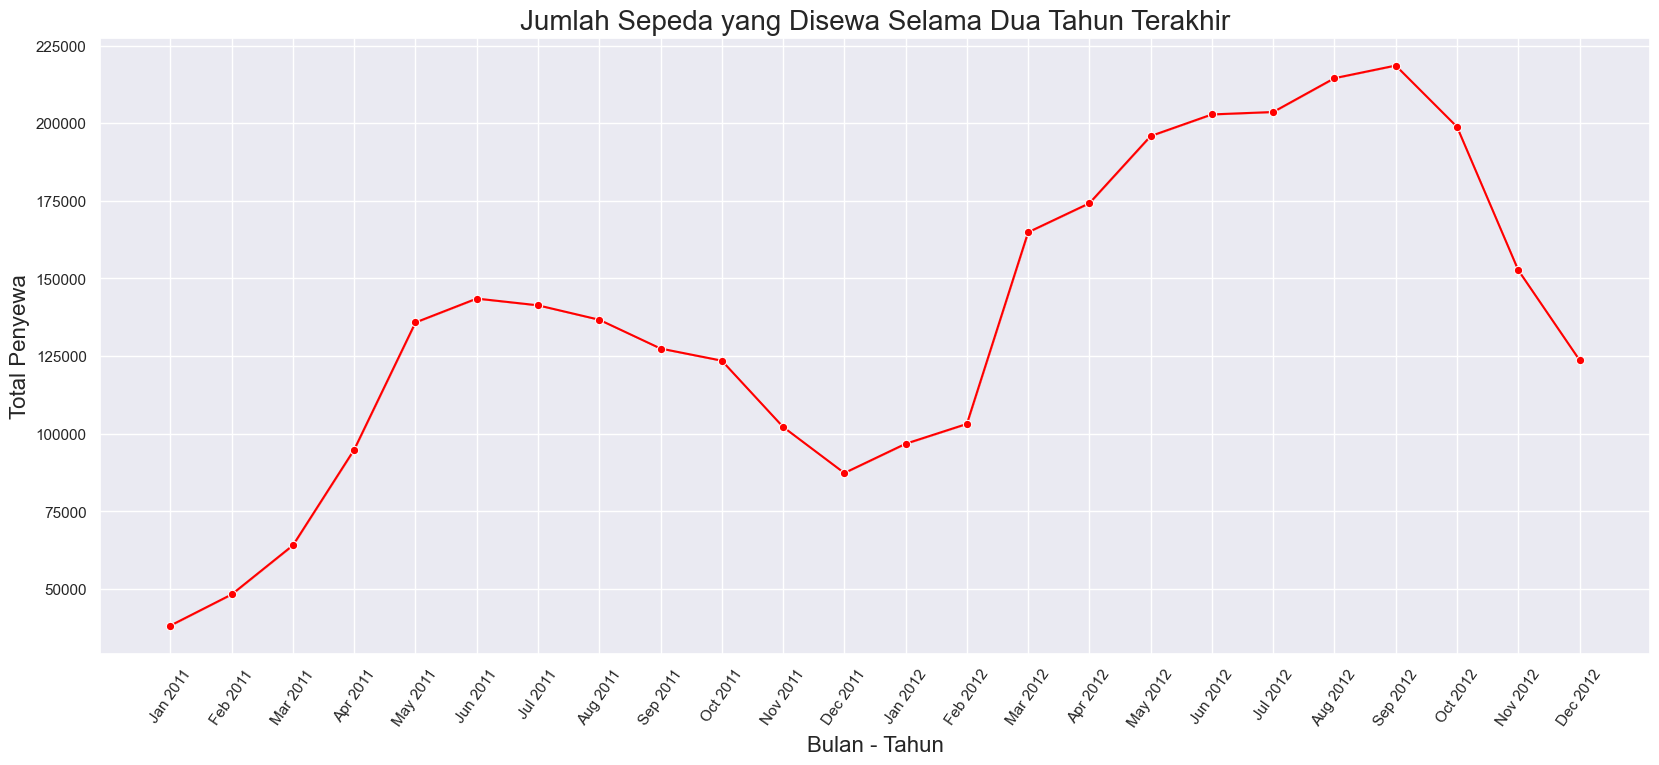

In [35]:
sortval = ['Jan 2011', 'Feb 2011', 'Mar 2011', 'Apr 2011', 'May 2011', 'Jun 2011',
           'Jul 2011', 'Aug 2011', 'Sep 2011', 'Oct 2011', 'Nov 2011', 'Dec 2011',
           'Jan 2012', 'Feb 2012', 'Mar 2012', 'Apr 2012', 'May 2012', 'Jun 2012',
           'Jul 2012', 'Aug 2012', 'Sep 2012', 'Oct 2012', 'Nov 2012', 'Dec 2012']

day_df['year_month'] = day_df['month'].apply(lambda x: x[:3]) + ' ' + day_df['year'].astype(str)

day_df['year_month'] = pd.Categorical(day_df['year_month'], categories=sortval, ordered=True)

day_df['sum_total'] = day_df.groupby('year_month')['total_count'].transform('sum')

plt.figure(figsize=(20, 8))
sns.set(style='darkgrid')
sns.lineplot(
    data=day_df.sort_values('year_month'),
    x='year_month',
    y='sum_total',
    marker='o',
    color='red'
)

plt.title("Jumlah Sepeda yang Disewa Selama Dua Tahun Terakhir", fontsize=20)
plt.xlabel("Bulan - Tahun", fontsize=16)
plt.ylabel("Total Penyewa", fontsize=16)
plt.xticks(rotation=55)
plt.show()


In [36]:
year_month_sum= day_df[['year_month', 'sum_total']].drop_duplicates().sort_values(by='year_month')
year_month_sum.sort_values(by='sum_total', ascending=False)

,year_month,sum_total
609,Sep 2012,218573
578,Aug 2012,214503
547,Jul 2012,203607
517,Jun 2012,202830
639,Oct 2012,198841
486,May 2012,195865
456,Apr 2012,174224
425,Mar 2012,164875
670,Nov 2012,152664
151,Jun 2011,143512


**Kesimpulan**

Terdapat tren peningkatan yang signifikan dalam penyewaan sepeda selama dua tahun terakhir. Bulan Januari mencatat jumlah penyewaan terendah, dengan total hanya 38189  unit. Sebaliknya, bulan September 2012 mencapai puncak penyewaan tertinggi, dengan total 218.573 unit. Meskipun demikian, setelah bulan tersebut, terjadi penurunan yang cukup signifikan, yang mungkin disebabkan oleh perubahan musim menuju musim dingin (winter), yang cenderung mengurangi minat masyarakat untuk menyewa sepeda.



### Pertanyaan 2: Jumlah Penyewa Berdasarkan Musim

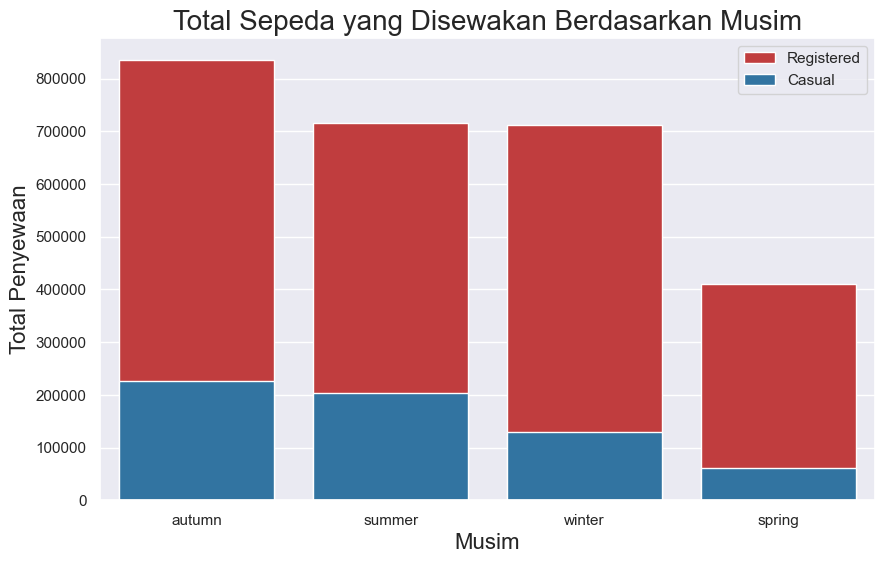

In [37]:

# Membuat variabel total data pelanggan registered dan kasual setiap season
sewa_musim = day_df.groupby('season')[['registered', 'casual']].sum().reset_index()

# Menghitung total penyewaan untuk mengurutkan
sewa_musim['total'] = sewa_musim['registered'] + sewa_musim['casual']

# Mengurutkan data dari terbesar ke terkecil berdasarkan total penyewaan
sewa_musim = sewa_musim.sort_values(by='total', ascending=False)

# Membuat bar chart
plt.figure(figsize=(10, 6))

# Menambahkan bar untuk jumlah pengguna terdaftar
sns.barplot(
    data=sewa_musim,
    x='season',
    y='registered',
    label='Registered',
    color='tab:red'
)

# Menambahkan bar untuk jumlah pengguna kasual
sns.barplot(
    data=sewa_musim,
    x='season',
    y='casual',
    label='Casual',
    color='tab:blue'
)

# Menambahkan judul dan label
plt.title('Total Sepeda yang Disewakan Berdasarkan Musim', fontsize=20)
plt.xlabel('Musim', fontsize=16)
plt.ylabel('Total Penyewaan', fontsize=16)

# Menambahkan legend
plt.legend()

# Menampilkan plot
plt.show()


**Kesimpulan**

Grafik ini menunjukkan bahwa musim dengan jumlah penyewa terbanyak adalah autumn (musim gugur), mencapai lebih dari 800.000 penyewa, sementara musim dengan jumlah penyewa paling sedikit adalah spring (musim semi). Temuan ini mengindikasikan preferensi pengguna terhadap penyewaan sepeda yang lebih tinggi pada musim gugur, mungkin disebabkan oleh kondisi cuaca yang lebih nyaman dan daya tarik kegiatan luar ruangan, sedangkan musim semi menunjukkan kurangnya minat atau faktor lain yang membatasi jumlah penyewa.

In [38]:
sewa_musim

,season,registered,casual,total
0,autumn,835038,226091,1061129
2,summer,715067,203522,918589
3,winter,711831,129782,841613
1,spring,410726,60622,471348


### Pertanyaan 3: Jumlah Penyewa Berdasarkan Cuaca

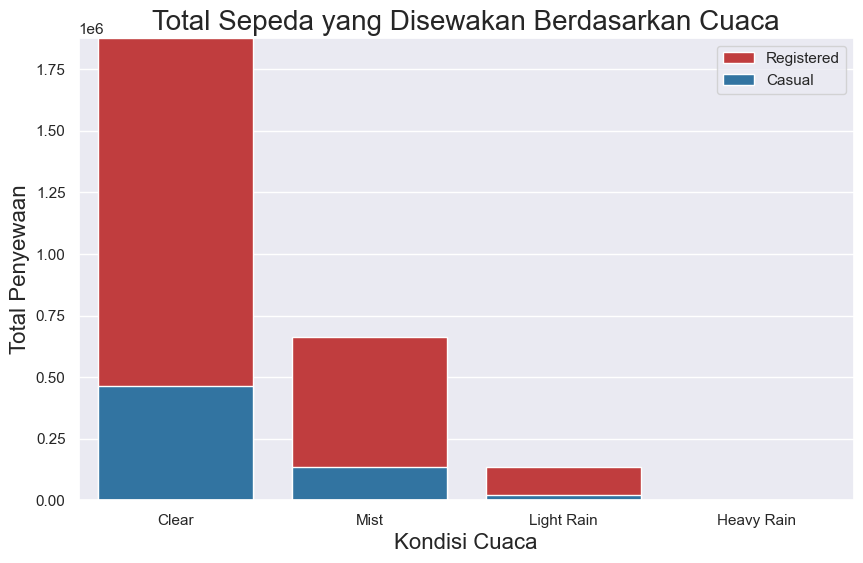

In [39]:
# Mengelompokkan data berdasarkan kondisi cuaca
sewa_cuaca = hour_df.groupby('weather_condition')[['registered', 'casual']].sum().reset_index()

# Menghitung total penyewaan untuk mengurutkan
sewa_cuaca['total'] = sewa_cuaca['registered'] + sewa_cuaca['casual']

# Mengurutkan data dari terbesar ke terkecil berdasarkan total penyewaan
sewa_cuaca = sewa_cuaca.sort_values(by='total', ascending=False)

# Membuat bar chart
plt.figure(figsize=(10, 6))

# Menambahkan bar untuk jumlah pengguna terdaftar
sns.barplot(
    data=sewa_cuaca,
    x='weather_condition',
    y='registered',
    label='Registered',
    color='tab:red'
)

# Menambahkan bar untuk jumlah pengguna kasual
sns.barplot(
    data=sewa_cuaca,
    x='weather_condition',
    y='casual',
    label='Casual',
    color='tab:blue'
)

# Menambahkan judul dan label
plt.title('Total Sepeda yang Disewakan Berdasarkan Cuaca', fontsize=20)
plt.xlabel('Kondisi Cuaca', fontsize=16)
plt.ylabel('Total Penyewaan', fontsize=16)

# Memastikan sumbu y menampilkan rentang yang tepat
plt.ylim(0, sewa_cuaca[['registered', 'casual']].values.max() + 100)  # Atur batas atas sumbu y

# Menambahkan legend
plt.legend()

# Menampilkan plot
plt.show()


**Kesimpulan**

Grafik ini menunjukkan bahwa kondisi cuaca memiliki pengaruh yang signifikan terhadap total penyewaan sepeda. Dalam hal ini, cuaca yang cerah (clear) mencatatkan jumlah penyewaan yang jauh lebih tinggi dibandingkan dengan cuaca hujan ringan (light rain), yang menunjukkan perbedaan yang mencolok. Temuan ini mengindikasikan bahwa cuaca cerah merupakan kondisi yang paling ideal untuk menyewa sepeda dan bersepeda, memberikan pengalaman yang lebih menyenangkan bagi para pengguna.

In [40]:
sewa_cuaca

,weather_condition,registered,casual,total
0,Clear,1875428,462745,2338173
3,Mist,661471,134481,795952
2,Light Rain,135548,22783,158331
1,Heavy Rain,215,8,223


### Pertanyaan 4 : Di waktu kapan paling banyak dilakukannya penyewaan sepeda? (Hour & Day)

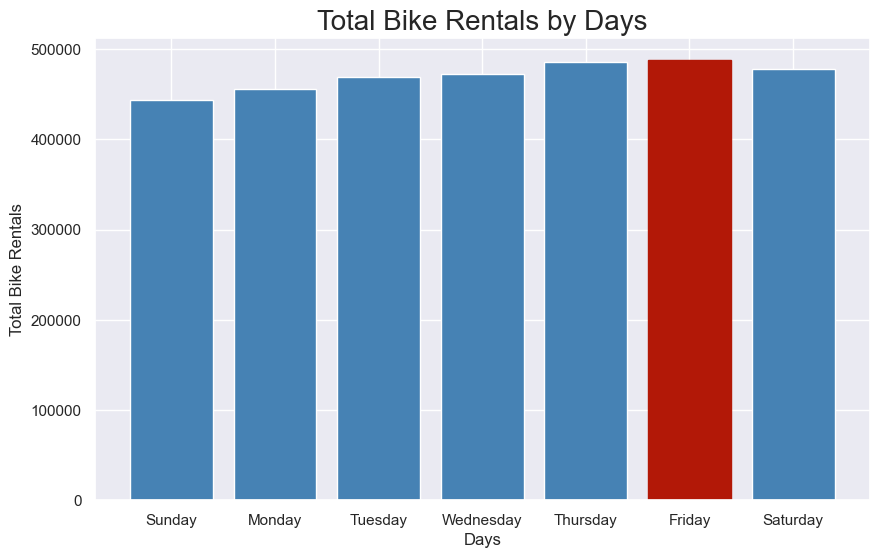

In [41]:
# Mengelompokkan data berdasarkan hari dalam seminggu dan menghitung total sewa
weekday_data = day_df.groupby('weekday')['total_count'].sum().reset_index()

# Membuat bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(weekday_data['weekday'], weekday_data['total_count'], color='#4682b4')

# Mengubah warna bar maksimum menjadi merah
max_value = weekday_data['total_count'].max()
for bar in bars:
    if bar.get_height() == max_value:
        bar.set_color('#B21807')

# Menambahkan label sumbu x dengan nama hari
plt.xticks(weekday_data['weekday'], ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])

# Menambahkan judul dan label sumbu
plt.title('Total Bike Rentals by Days', fontsize=20)
plt.xlabel('Days')
plt.ylabel('Total Bike Rentals')

# Menampilkan plot
plt.show()

**Kesimpulan**

Grafik ini menunjukkan bahwa hari Jumat merupakan hari paling sering orang melakukan penyewaan sepeda dalam kurun waktu dua tahun terakhir, sementara hari Minggu mencatatkan jumlah penyewaan terendah. Temuan ini mengindikasikan bahwa banyak orang cenderung memanfaatkan layanan penyewaan sepeda pada akhir pekan untuk beraktivitas, seperti berolahraga atau bersantai. Sebaliknya, hari Minggu, yang biasanya lebih tenang, menunjukkan minat yang lebih rendah terhadap penyewaan sepeda. Hasil ini dapat membantu pengelola layanan penyewaan sepeda dalam merencanakan strategi promosi dan penjadwalan untuk meningkatkan jumlah penyewaan, terutama pada hari-hari dengan permintaan yang lebih rendah.

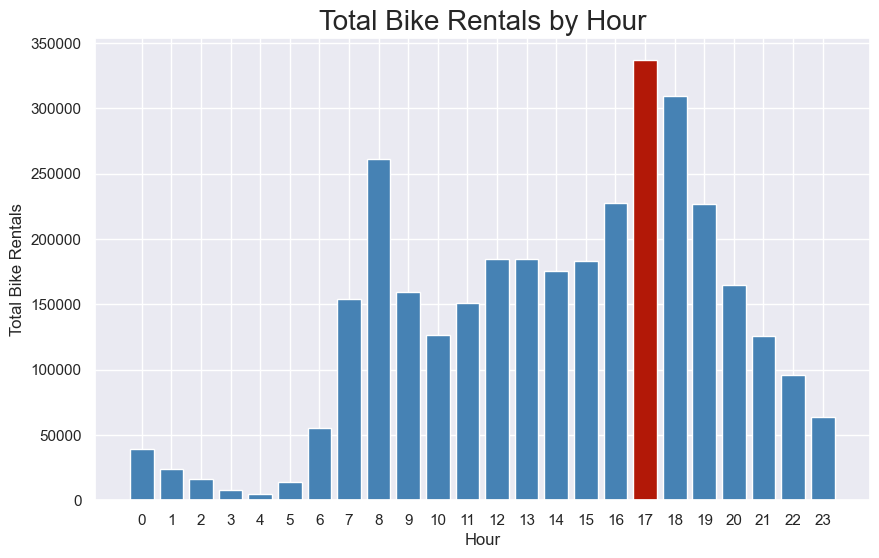

In [42]:
import matplotlib.pyplot as plt

# Menghitung total count berdasarkan jam
total_count_per_hour = hour_df.groupby('hour')['total_count'].sum()

# Membuat bar plot
plt.figure(figsize=(10, 6))

# Mencari indeks jam dengan total tertinggi
max_value_index = total_count_per_hour.idxmax()  # Mendapatkan indeks jam dengan nilai maksimum
colors = ['#B21807' if hour == max_value_index else '#4682b4' for hour in total_count_per_hour.index]

# Menggambar bar dengan warna yang sesuai
plt.bar(total_count_per_hour.index, total_count_per_hour.values, color=colors)

# Menambahkan judul dan label
plt.title('Total Bike Rentals by Hour', fontsize =20)
plt.xlabel('Hour')
plt.ylabel('Total Bike Rentals')
plt.xticks(total_count_per_hour.index)
# Menampilkan plot
plt.show()

**Kesimpulan**

Grafik ini menunjukkan bahwa pukul 5 sore adalah waktu paling banyak orang melakukan penyewaan sepeda, sedangkan pukul 4 pagi mencatatkan jumlah penyewaan yang paling sedikit. Temuan ini menandakan bahwa pukul 5 sore merupakan jam puncak (peak hour) untuk penyewaan sepeda. Dengan informasi ini, perusahaan dapat merencanakan strategi promosi yang lebih efektif, khususnya pada jam-jam sibuk tersebut, guna menarik lebih banyak pelanggan dan memaksimalkan potensi penyewaan. Hal ini dapat mencakup penawaran diskon, program loyalitas, atau kampanye pemasaran yang menyasar pengguna potensial di waktu-waktu puncak tersebut, sehingga meningkatkan visibilitas dan penjualan mereka.

## Conclusion

1. **Tren Penyewaan**: Selama dua tahun terakhir, kita melihat tren yang jelas dengan peningkatan signifikan dalam penyewaan sepeda. Januari 2011 menjadi bulan dengan penyewaan terendah, hanya 38189 unit, sementara September 2012 mencatatkan jumlah penyewaan tertinggi, mencapai 218.573 unit. Namun, setelah bulan tersebut, terjadi penurunan yang cukup signifikan, kemungkinan besar karena peralihan musim menuju musim dingin.

2. **Musim Penyewaan**: Dalam hal musim, grafik menunjukkan bahwa musim gugur adalah saat terbaik untuk penyewaan, dengan lebih dari 800.000 penyewa. Sebaliknya, musim semi mencatatkan jumlah penyewa yang paling sedikit.

3. **Pengaruh Cuaca**: Cuaca ternyata memainkan peranan penting dalam total penyewaan sepeda. Ketika cuaca cerah, jumlah penyewaan meningkat secara signifikan dibandingkan saat hujan ringan. Ini jelas menunjukkan bahwa cuaca cerah adalah kondisi terbaik untuk menyewa sepeda.

4. **Waktu Penyewaan**: Jika kita lihat dari segi hari, Jumat adalah hari yang paling banyak orang melakukan penyewaan sepeda dalam dua tahun terakhir, sementara Minggu adalah hari dengan jumlah penyewa paling sedikit. Sedangkan jika dilihat dari segi jam menunjukkan bahwa pukul 5 sore adalah waktu paling ramai untuk penyewaan sepeda, sedangkan pukul 4 pagi adalah waktu paling sepi. Temuan ini bisa menjadi peluang bagi perusahaan untuk melakukan promosi efektif di sekitar jam puncak tersebut, untuk menarik lebih banyak pelanggan.


## Analisis Lanjutan (Opsional)

In [43]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   instant            17379 non-null  int64         
 1   date               17379 non-null  datetime64[ns]
 2   season             17379 non-null  object        
 3   year               17379 non-null  int64         
 4   month              17379 non-null  object        
 5   hour               17379 non-null  int64         
 6   holiday            17379 non-null  int64         
 7   weekday            17379 non-null  int64         
 8   workingday         17379 non-null  int64         
 9   weather_condition  17379 non-null  object        
 10  casual             17379 non-null  int64         
 11  registered         17379 non-null  int64         
 12  total_count        17379 non-null  int64         
dtypes: datetime64[ns](1), int64(9), object(3)
memory usage: 1.7+ 

In [44]:
# Mengelompokkan data berdasarkan jam, menghitung nilai agregasi
rfm_analisis = hour_df.groupby(by="hour", as_index=False).agg({
    "date": "max",        # Tanggal terakhir (terbaru)
    "instant": "nunique",  # Menghitung unik ID order
    "total_count": "sum"   # Jumlah total penyewaan
})

# Mengganti nama kolom
rfm_analisis.columns = ["hour", "last_order_date", "order_count", "revenue"]

# Mendapatkan nilai tanggal terbaru (recent date) dari kolom 'date'
recent_date = hour_df["date"].max().date()

# Perhitungan recency dalam hari
rfm_analisis["last_order_date"] = rfm_analisis["last_order_date"].dt.date
rfm_analisis["recency"] = rfm_analisis["last_order_date"].apply(lambda x: (recent_date - x).days)

# Drop kolom 'last_order_date' setelah menghitung recency
rfm_analisis.drop("last_order_date", axis=1, inplace=True)

# Menampilkan hasil akhir
rfm_analisis.head()


,hour,order_count,revenue,recency
0,0,726,39130,0
1,1,724,24164,0
2,2,715,16352,0
3,3,697,8174,0
4,4,697,4428,0


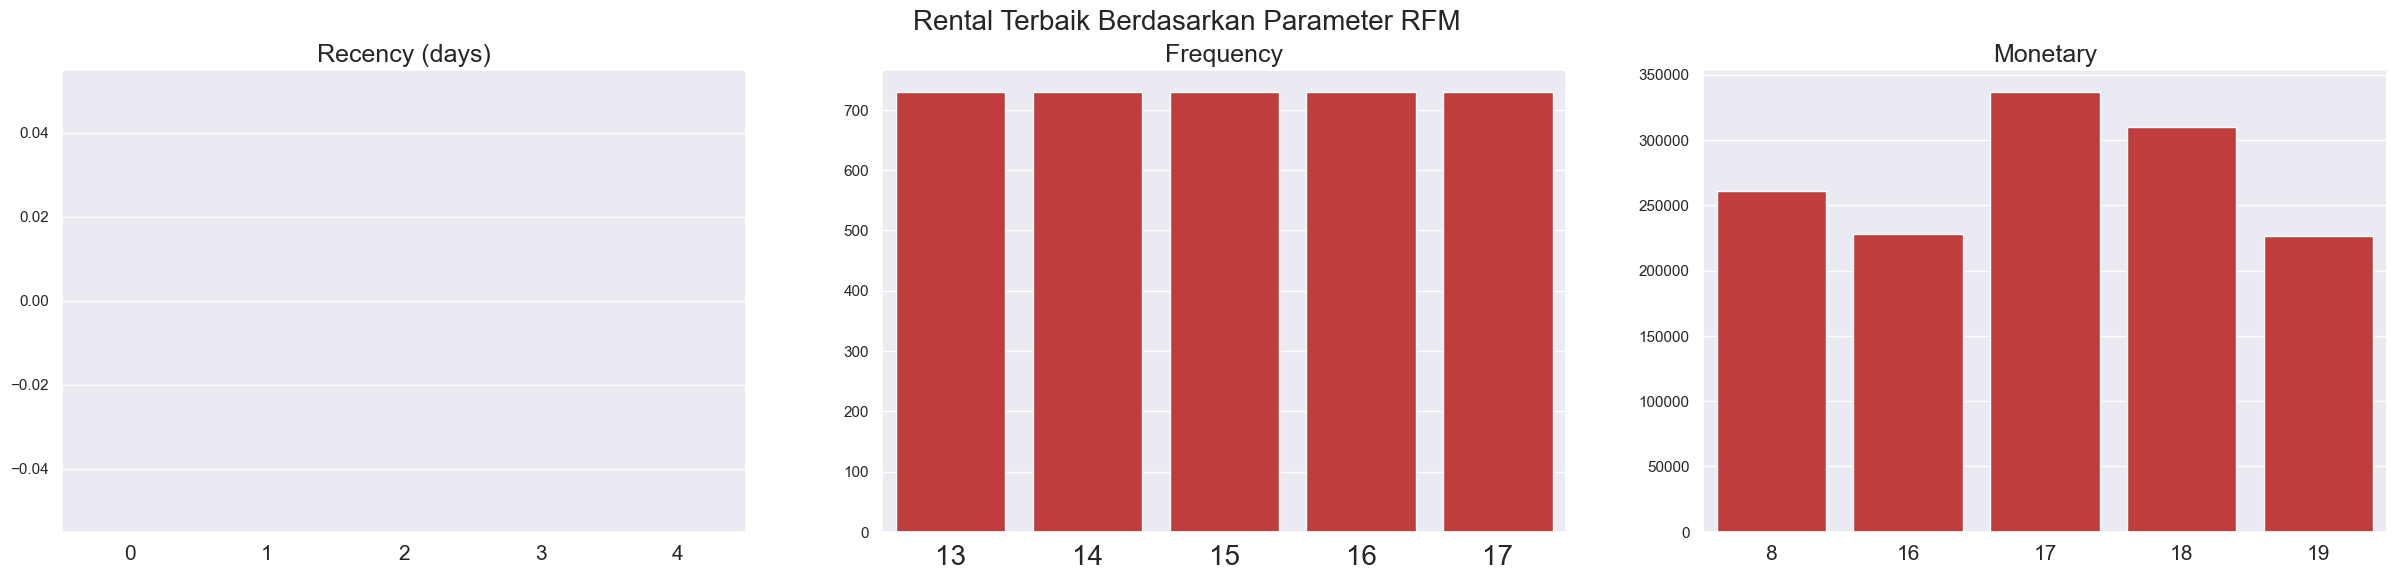

In [45]:
# Sortir data berdasarkan parameter RFM dengan variabel baru
top_recency_new = rfm_analisis.sort_values(by="recency", ascending=True).head(5)
top_frequency_new = rfm_analisis.sort_values(by="order_count", ascending=False).head(5)
top_monetary_new = rfm_analisis.sort_values(by="revenue", ascending=False).head(5)

# Membuat bar plot untuk RFM
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

# Plot top recency
sns.barplot(
    data=top_recency_new,
    x="hour",
    y="recency",
    color='tab:red',
    ax=ax[0]
)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis='x', labelsize=15)

# Plot top frequency
sns.barplot(
    data=top_frequency_new,
    x="hour",
    y="order_count",
    color='tab:red',
    ax=ax[1]
)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=20)

# Plot top monetary
sns.barplot(
    data=top_monetary_new,
    x="hour",
    y="revenue",
    color='tab:red',
    ax=ax[2]
)
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

# Setel judul utama untuk plot
plt.suptitle("Rental Terbaik Berdasarkan Parameter RFM", fontsize=20)
plt.show()


**Kesimpulan**
1. **Recency**: Menunjukkan jam di mana transaksi terakhir paling baru dilakukan.
2. **Frequency**: Mengukur seberapa sering transaksi terjadi pada jam tersebut, dengan jam yang lebih sering digunakan muncul di urutan teratas.
3. **Monetary**: Menggambarkan jumlah total transaksi yang terjadi pada jam tersebut, menampilkan jam dengan pendapatan tertinggi di posisi teratas.

RFM Analysis ini menggunakan kolom jam untuk mengidentifikasi waktu-waktu optimal dalam sehari yang dapat memberikan kontribusi maksimal terhadap jumlah penyewaan sepeda.